## Import

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings ; warnings.filterwarnings('ignore')

## Read Data

In [2]:
# 구매 데이터 읽기
purchase = pd.read_csv('../data/DC_구매내역정보.csv', parse_dates=['구매일자'], encoding='cp949')
print('데이터 크기:', purchase.shape)

데이터 크기: (100207, 13)


In [3]:
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매수량,구매금액,취소여부,증정상품,거래ID,매장ID,환불기간,구매거래ID
53778,542416040,레포츠,스포츠용품/의류,경기 이천시,2014-05-06 16:00:00,1,53000,0,0,21856,백화점,NaN,NaN
61173,622589951,식품,농산물,경기 성남시,2014-03-11 16:00:00,1,4000,0,0,25002,백화점,NaN,NaN
29274,293365316,식품,가공식품,경기 안양시,2014-08-23 15:00:00,1,6000,0,0,11904,백화점,NaN,NaN
88084,882284269,생활잡화,화장품,서울 동대문구,2014-09-27 16:00:00,-1,-35000,1,0,35625,백화점,NaN,NaN
41382,415961052,식품,가공식품,서울 송파구,2014-05-31 14:00:00,1,18000,0,0,16795,백화점,NaN,NaN


## RFM
- Recency(최근 구매일), Frequency(구매빈도), Monetary(구매금액)의 약자로, 고객 평가와 세분화를 위한 기법 중 하나이다.<br>
  $\bullet$ Recency: 최근에 상품이나 서비스를 구매한 고객은 새로운 마케팅에 잠재적으로 더 높은 관심을 가질 수 있음을 반영한 지표<br>
  $\bullet$ Frequency: 자주 구매하는 고객은 브랜드에 대한 충성도가 높을 가능성이 있음을 반영한 지표<br>
  $\bullet$ Monetary: 높은 구매 금액을 가진 고객은 기업의 수익에 더 많은 기여를 할 수 있음을 반영한 지표
- 고객의 행동 패턴을 분석하고 고객 세분화 및 군집별 가치 있는 정보를 도출해 효과적인 `타켓` 마케팅 전략을 수립하고 개선할 수 있다.

## $\blacktriangleright$ 백화점

In [5]:
department = purchase.query('매장ID=="백화점"')

In [41]:
# Recency는 작으면 좋음으로 12.31.에서 해당 날짜를 빼는 것이 아닌 해당 날짜에서 12.31.을 빼는 것으로 구한다.
departmentfeature = pd.concat([department.groupby('ID')['구매일자'].agg(lambda x: (x.max() - pd.to_datetime("2014-12-31")).days).rename('recency'),
                               department.groupby('ID')['거래ID'].nunique().rename('frequency'),
                               department.groupby('ID')['구매금액'].sum().rename('monetary')], axis=1)
departmentfeature.shape

(3214, 3)

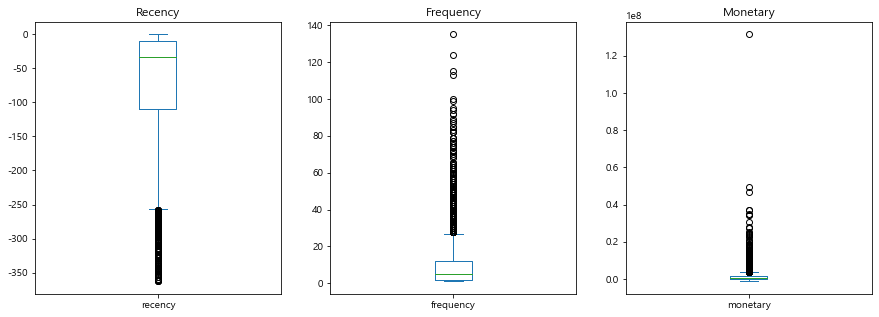

In [28]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
departmentfeature['recency'].plot.box(title="Recency", ax=ax[0])
departmentfeature['frequency'].plot.box(title="Frequency", ax=ax[1])
departmentfeature['monetary'].plot.box(title="Monetary", ax=ax[2])
plt.show()

In [43]:
# Monetary의 이상치를 제거한다.
departmentfeature.drop([departmentfeature.monetary.idxmax()], inplace=True)

In [34]:
# Scaling을 진행한다.
scaler = MinMaxScaler() 
departmentfeature[departmentfeature.columns] = scaler.fit_transform(departmentfeature) 

In [46]:
departmentfeature['frequency'].apply(np.log)

ID
741463       1.791759
909249       2.197225
1065068      0.693147
1310410      0.000000
1387032      1.386294
               ...   
998623524    1.791759
999024423    0.000000
999184958    1.609438
999375162    2.639057
999494396    1.098612
Name: frequency, Length: 3213, dtype: float64

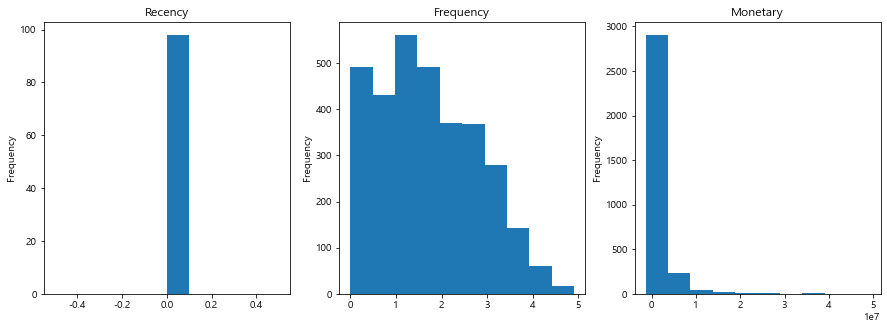

In [50]:
# standard
fig, ax = plt.subplots(1,3,figsize=(15,5))
departmentfeature['recency'].apply(np.sqrt).plot.hist(title="Recency", ax=ax[0])
departmentfeature['frequency'].apply(np.log).plot.hist(title="Frequency", ax=ax[1])
departmentfeature['monetary'].plot.hist(title="Monetary", ax=ax[2])
plt.show()

In [ ]:
import numpy as np

def outlier_remove(data, threshold=3):
    z_scores = np.abs(data - np.mean(data)) / np.std(data) # Z-score 계산
    
    filtered_data = data[z_scores < threshold]
    outlier = data[z_scores>threshold]
    
    return filtered_data, outlier

if __name__ == '__main__':
    X = np.random.normal(0, 1000, 1000)
    filtered_data, outlier = outlier_remove(X)

## $\blacktriangleright$ 하이마트

In [31]:
himart = purchase.query('매장ID=="하이마트"')

In [52]:
# Recency는 작으면 좋음으로 12.31.에서 해당 날짜를 빼는 것이 아닌 해당 날짜에서 12.31.을 빼는 것으로 구한다.
himartfeature = pd.concat([himart.groupby('ID')['구매일자'].agg(lambda x: (x.max() - pd.to_datetime("2014-12-31")).days).rename('recency'),
                           himart.groupby('ID')['거래ID'].nunique().rename('frequency'),
                           himart.groupby('ID')['구매금액'].sum().rename('monetary')], axis=1)
himartfeature.shape

(2786, 3)

In [54]:
# Recency는 작으면 좋음으로 12.31.에서 해당 날짜를 빼는 것이 아닌 해당 날짜에서 12.31.을 빼는 것으로 구한다.
purchasefeature = pd.concat([purchase.groupby(['ID','매장ID'])['구매일자'].agg(lambda x: (x.max() - pd.to_datetime("2014-12-31")).days).rename('recency'),
                           purchase.groupby(['ID','매장ID'])['거래ID'].nunique().rename('frequency'),
                           purchase.groupby(['ID','매장ID'])['구매금액'].sum().rename('monetary')], axis=1)
purchasefeature.shape

(6000, 3)

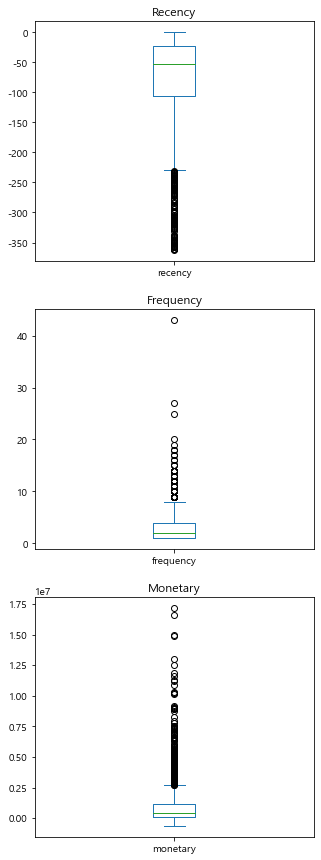

In [24]:
fig, ax = plt.subplots(3,1,figsize=(5,15))
himartfeature['recency'].plot.box(title="Recency", ax=ax[0])
himartfeature['frequency'].plot.box(title="Frequency", ax=ax[1])
himartfeature['monetary'].plot.box(title="Monetary", ax=ax[2])
plt.show()

In [ ]:
# 하이마트 고객의 주기성을 확인해야 한다.

In [41]:
# himartfeature에서 outlier 해당하는 고객 제외
q1, q3  = himartfeature.recency.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
himartfeature = himartfeature.query('@low <= recency <= @upper')

q1, q3  = himartfeature.frequency.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
himartfeature = himartfeature.query('@low <= frequency <= @upper')

q1, q3  = himartfeature.monetary.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
himartfeature = himartfeature.query('@low <= monetary <= @upper')
himartfeature.shape

(2207, 3)

In [36]:
# departmentfeature에서 outlier 해당하는 고객 제외
q1, q3  = departmentfeature.recency.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
departmentfeature = departmentfeature.query('@low <= recency <= @upper')

q1, q3  = departmentfeature.frequency.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
departmentfeature = departmentfeature.query('@low <= frequency <= @upper')

q1, q3  = departmentfeature.monetary.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
departmentfeature = departmentfeature.query('@low <= monetary <= @upper')
departmentfeature.shape

(2288, 3)

In [55]:
# purchasefeature에서 outlier 해당하는 고객 제외
q1, q3  = purchasefeature.recency.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
purchasefeature = purchasefeature.query('@low <= recency <= @upper')

q1, q3  = purchasefeature.frequency.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
purchasefeature = purchasefeature.query('@low <= frequency <= @upper')

q1, q3  = purchasefeature.monetary.quantile(q=[0.25, 0.75])
IQR = q3 - q1
low, upper = q1 - IQR, q3 + IQR
purchasefeature = purchasefeature.query('@low <= monetary <= @upper')
purchasefeature.shape

(4164, 3)

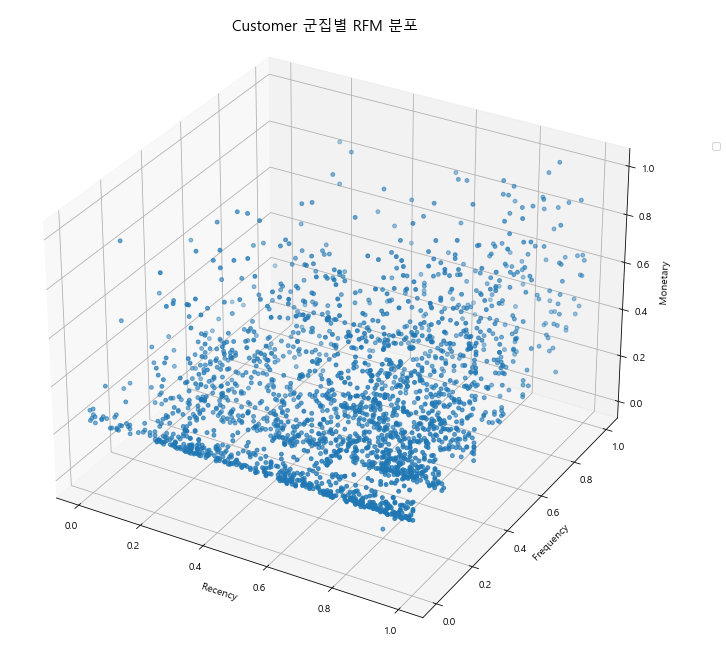

In [43]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
sc = ax.scatter3D(himartfeature.recency, himartfeature.frequency,himartfeature.monetary,marker='o', s=15, cmap='Set2')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.text(-0.15, 1, 1.2, "Customer 군집별 RFM 분포", fontdict={'fontsize':15})
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1, 0.8))
plt.show()

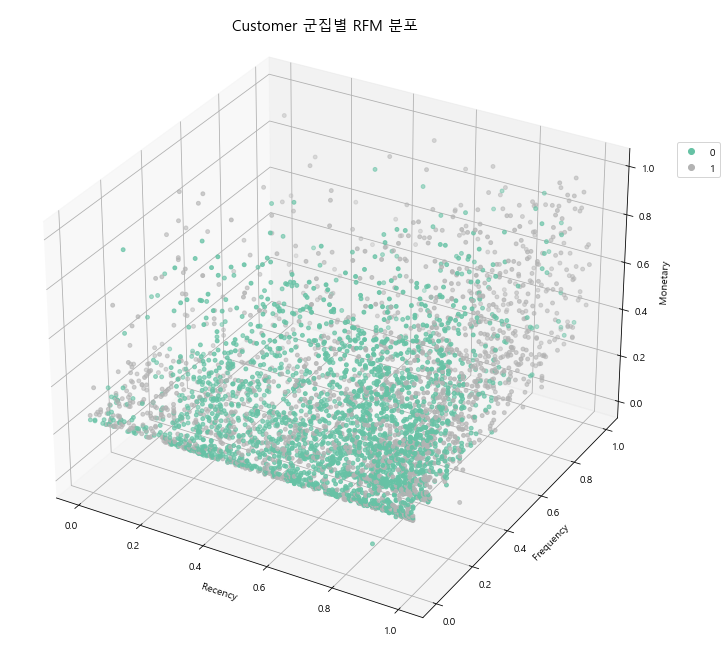

In [62]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
sc = ax.scatter3D(purchasefeature.recency, purchasefeature.frequency,purchasefeature.monetary, 
                  c=purchasefeature.매장ID.apply(lambda x: 1 if x=="백화점" else 0), marker='o', s=15, cmap='Set2')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.text(-0.15, 1, 1.2, "Customer 군집별 RFM 분포", fontdict={'fontsize':15})
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1, 0.8))
plt.show()

In [60]:
purchasefeature.reset_index(inplace=True)

In [59]:
purchasefeature.sort_values(by='monetary')

,,recency,frequency,monetary
ID,매장ID,,,
997894186,하이마트,0.829146,0.090909,0.000000
664594289,백화점,0.944724,0.363636,0.020331
36304587,백화점,0.844221,0.181818,0.150226
877028523,하이마트,0.949749,0.000000,0.234940
223194713,하이마트,0.226131,0.090909,0.239458
...,...,...,...,...
546305529,백화점,0.291457,0.272727,0.995858
431459315,백화점,0.879397,0.545455,0.996988
605477092,하이마트,0.708543,0.363636,0.999247


In [18]:
ease = departmentfeature.drop([700882892])

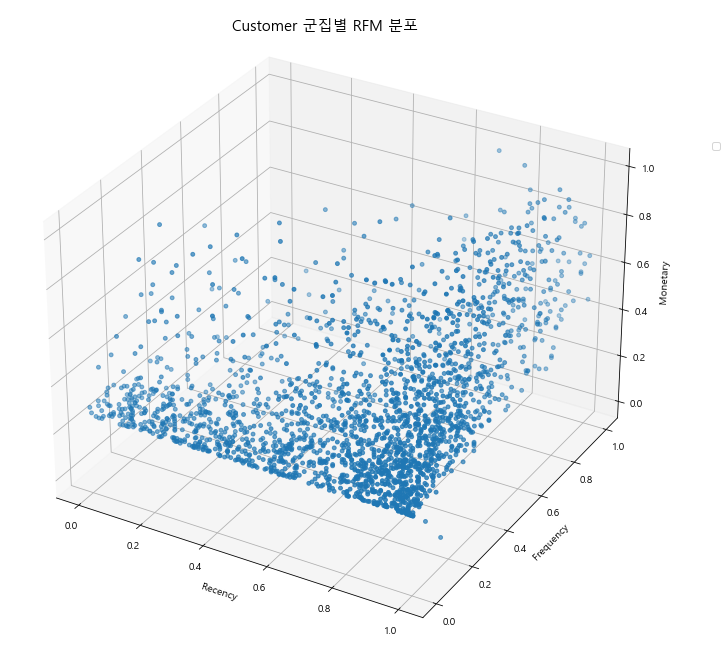

In [47]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
sc = ax.scatter3D(departmentfeature.recency, departmentfeature.frequency,departmentfeature.monetary,marker='o', s=15, cmap='Set2')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.text(-0.15, 1, 1.2, "Customer 군집별 RFM 분포", fontdict={'fontsize':15})
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1, 0.8))
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
himartfeature[himartfeature.columns] = scaler.fit_transform(himartfeature) 

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
purchasefeature[purchasefeature.columns] = scaler.fit_transform(purchasefeature) 

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
departmentfeature[departmentfeature.columns] = scaler.fit_transform(departmentfeature) 

In [64]:
purchasefeature.sort_values(by='monetary')

,ID,매장ID,recency,frequency,monetary
4155,997894186,하이마트,0.829146,0.090909,0.000000
2725,664594289,백화점,0.944724,0.363636,0.020331
164,36304587,백화점,0.844221,0.181818,0.150226
3584,877028523,하이마트,0.949749,0.000000,0.234940
915,223194713,하이마트,0.226131,0.090909,0.239458
...,...,...,...,...,...
2239,546305529,백화점,0.291457,0.272727,0.995858
1764,431459315,백화점,0.879397,0.545455,0.996988
2480,605477092,하이마트,0.708543,0.363636,0.999247
231,48500958,하이마트,0.688442,0.090909,0.999623
